In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv('SDSS_notOutliers.csv', index_col=0) # dataframe
print(df.shape) #(observaciones, variables)
df.describe()
df.head()

(49414, 15)


,SDSS,z,u_mag,sig_u_mag,g_mag,sig_g_mag,r_mag,sig_r_mag,i_mag,sig_i_mag,z_mag,sig_z_mag,FIRST,ROSAT,Mp
2,000008.13+001634.6,1.8365,20.233,0.054,20.200,0.024,19.945,0.032,19.491,0.032,19.191,0.068,0.0,-9.00,-25.738
4,000009.38+135618.4,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,18.331,0.024,18.110,0.033,-1.0,-9.00,-27.419
5,000009.42-102751.9,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,18.791,0.018,18.751,0.047,0.0,-9.00,-26.459
6,000011.41+145545.6,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,19.193,0.025,19.005,0.047,-1.0,-9.00,-22.728
7,000011.96+000225.3,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,17.956,0.014,17.911,0.029,0.0,-1.66,-24.046


                  z     u_mag  sig_u_mag     g_mag  sig_g_mag     r_mag  \
z          1.000000  0.170471   0.131801  0.122759   0.010245  0.145320   
u_mag      0.170471  1.000000   0.809862  0.922964   0.190106  0.869133   
sig_u_mag  0.131801  0.809862   1.000000  0.728178   0.261174  0.675306   
g_mag      0.122759  0.922964   0.728178  1.000000   0.219346  0.952879   
sig_g_mag  0.010245  0.190106   0.261174  0.219346   1.000000  0.213341   
r_mag      0.145320  0.869133   0.675306  0.952879   0.213341  1.000000   
sig_r_mag  0.039446  0.312685   0.360287  0.353791   0.327692  0.385077   
i_mag      0.088728  0.828172   0.635539  0.914954   0.206082  0.961881   
sig_i_mag  0.030875  0.415282   0.425278  0.466884   0.291813  0.498910   
z_mag      0.103036  0.757481   0.568224  0.868778   0.194218  0.915612   
sig_z_mag  0.073624  0.651835   0.587278  0.754633   0.240954  0.795331   
FIRST     -0.006514  0.030640   0.044795 -0.005233   0.015762 -0.032794   
ROSAT     -0.255691 -0.13

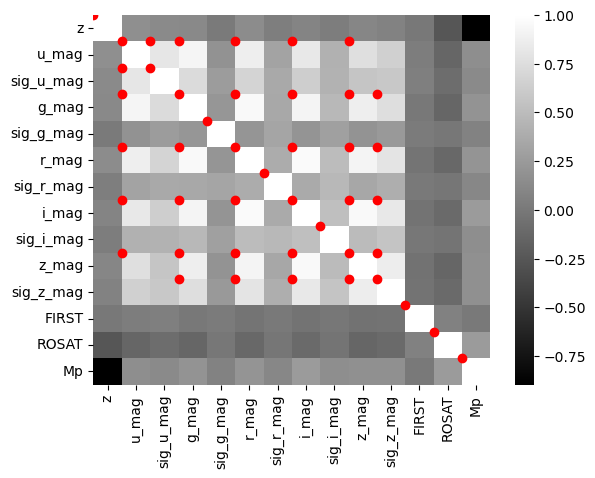

In [3]:
############# COVARIANZA #####################33333333333
cov = df.corr()
print(cov)
print(cov.shape)
sns.heatmap(cov, cmap = 'gray')
plt.scatter(np.where(cov > 0.75 )[0],np.where(cov > 0.75 )[1],color='red')

def nombre(x):
    return df.columns.values[x]

positiva = [] 
negativa = []
x = nombre(np.where(cov >= 0.8 )[0])
xn =nombre(np.where(cov <= -0.8 )[0])
y = nombre(np.where(cov >= 0.8 )[1]) 
yn = nombre(np.where(cov <= -0.8 )[1])
correlaciones = []
print('Correlacion directa.')
for i in range(len(x)): 

    if x[i] != y[i]:
        correlaciones.append([x[i],y[i]])
        print(x[i],',',y[i])
print('\nCorrelacion inversa.')
correlaciones_n = []
for i in range(len(xn)): 

    if xn[i] != yn[i]:
        correlaciones_n.append([xn[i],yn[i]])
        print(xn[i],',',yn[i])



In [5]:
X = np.array(df['z_mag']).reshape((-1,1))
y = np.array(df['i_mag'])
i_mag = y
print(i_mag)
model = LinearRegression().fit(X ,y)
R_sq = model.score(X,i_mag)

print('Coeficiente de determinacion: ',R_sq)
print('Intercepto (b0): ',model.intercept_)
print('Pendiente (b1): ',model.coef_)


[19.491 18.331 18.791 ... 18.51  19.387 18.118]
Coeficiente de determinacion:  0.9114061726461491
Intercepto (b0):  1.3925487363826434
Pendiente (b1):  [0.92998903]
